# Proyek Analisis Data: Bike-Sharing-Dataset
- **Nama:** Naufal Nazhir Nashifuddin
- **Email:** naufalnazhir15@gmail.com
- **ID Dicoding:** M180D4KY2983@bangkit.academy

## Menentukan Pertanyaan Bisnis

- Apa dampak liburan dan acara khusus terhadap jumlah penumpang?
- Bagaimana pola penggunaan sepeda berubah sepanjang hari, dan apa dampaknya terhadap jumlah penumpang?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Dilakukan load data untuk menyiapkan seluruh data yang dibutuhkan

In [ ]:
day_data = pd.read_csv("/content/day.csv")
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_data = pd.read_csv("/content/hour.csv")
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Pada tahap ini, kita akan melakukan evaluasi menyeluruh terhadap kualitas data yang akan digunakan dengan tujuan untuk mengenali segala permasalahan yang mungkin ada dalam dataset tersebut.

In [ ]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB



Di sini, terlihat bahwa tipe data untuk kolom "dteday" perlu disesuaikan lebih baik, maka dapat dilakukan perubahan itu di sesi pembersihan data nanti. Selain itu, tidak ditemukan kekurangan data ("Missing Data") saat ini, sehingga proses ini dapat dilanjutkan tanpa masalah.

In [ ]:
print("Jumlah duplikasi: ", day_data.duplicated().sum())

Jumlah duplikasi:  0


Tidak ditemukan duplikasi

In [ ]:
day_data.describe()

,instant,season,year,month,holiday,weekday,workingday,weather,Temperature,atemp,humidity,windspeed,casual,registered,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000



Informasi tentang tabel day.csv dan seluruh data yang tersedia dapat ditemukan di baris "count" untuk setiap kolom.

In [ ]:
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Sama halnya disini kita dapat melihat juga bahwa untuk tipe data pada kolom "dteday" kurang tepat, kita dapat menggantikannya nanti pada sesi cleaning data. Dan apabila kita lihat tidak ada juga terjadi "Missing Data" sehingga kita dapat melanjutkan proses ini.

In [ ]:
print("Jumlah duplikasi: ", hour_data.duplicated().sum())

Jumlah duplikasi:  0


Juga tidak ditemukan duplikasi

In [ ]:
hour_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Informasi tentang tabel hour.csv dan seluruh data yang tersedia dapat ditemukan di baris "count" untuk setiap kolom.

### Cleaning Data


Pada tahap ini, dilakukan beberapa penyesuaian untuk meningkatkan kualitas data agar lebih mudah dipahami, seperti mengubah tipe data kolom "dteday" menjadi tipe "datetime".

In [ ]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_data[column] = pd.to_datetime(day_data[column])

datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_data[column] = pd.to_datetime(hour_data[column])

Selanjutnya, beberapa nama yang agak membingungkan akan diubah berdasarkan informasi yang saya baca di "readme.txt". Berikut daftarnya:

dteday diganti menjadi date
yr diganti menjadi year
mnth diganti menjadi month
hr diganti menjadi hour
weathersit diganti menjadi weather
hum diganti menjadi humidity
cnt diganti menjadi count

In [ ]:
day_data = day_data.rename(columns={"weathersit":"weather",
                       "dteday":"date",
                       "yr":"year",
                       "mnth":"month",
                       "hum":"humidity",
                       "cnt":"count",
                                    "temp":"Temperature"})

In [ ]:
hour_data = hour_data.rename(columns={"weathersit":"weather",
                       "dteday":"date",
                       "yr":"year",
                       "mnth":"month",
                       "hum":"humidity",
                       "cnt":"count",
                      "temp":"Temperature"})

Langkah selanjutnya adalah mengecek perubahan

In [ ]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      731 non-null    int64         
 1   date         731 non-null    datetime64[ns]
 2   season       731 non-null    int64         
 3   year         731 non-null    int64         
 4   month        731 non-null    int64         
 5   holiday      731 non-null    int64         
 6   weekday      731 non-null    int64         
 7   workingday   731 non-null    int64         
 8   weather      731 non-null    int64         
 9   Temperature  731 non-null    float64       
 10  atemp        731 non-null    float64       
 11  humidity     731 non-null    float64       
 12  windspeed    731 non-null    float64       
 13  casual       731 non-null    int64         
 14  registered   731 non-null    int64         
 15  count        731 non-null    int64         
dtypes: datet

In [ ]:
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      17379 non-null  int64         
 1   date         17379 non-null  datetime64[ns]
 2   season       17379 non-null  int64         
 3   year         17379 non-null  int64         
 4   month        17379 non-null  int64         
 5   hr           17379 non-null  int64         
 6   holiday      17379 non-null  int64         
 7   weekday      17379 non-null  int64         
 8   workingday   17379 non-null  int64         
 9   weather      17379 non-null  int64         
 10  Temperature  17379 non-null  float64       
 11  atemp        17379 non-null  float64       
 12  humidity     17379 non-null  float64       
 13  windspeed    17379 non-null  float64       
 14  casual       17379 non-null  int64         
 15  registered   17379 non-null  int64         
 16  coun

In [ ]:
day_data.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather,Temperature,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_data.head()

,instant,date,season,year,month,hr,holiday,weekday,workingday,weather,Temperature,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore ...

**Pertanyaan 1**

Langkah pertama Konversi kolom date menjadi tipe data datetime

In [ ]:
day_data['date'] = pd.to_datetime(day_data['date'])
hour_data['date'] = pd.to_datetime(hour_data['date'])

Selanjutnya adalah Menghitung jumlah penumpang total per hari

In [ ]:
daily_passengers = day_data.groupby('date')['count'].sum()

Kemudian Memisahkan penumupang pada hari libur dan hari biasa

In [ ]:
holiday_passengers = day_data[day_data['holiday'] == 1].groupby('date')['count'].sum()
non_holiday_passengers = day_data[day_data['holiday'] == 0].groupby('date')['count'].sum()

**Pertanyaan 2**

Hal yang pelu dilakukan adalah Menghitung jumlah penumpang total per jam

In [ ]:
hourly_passengers = hour_data.groupby('hr')['count'].mean()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Berdasar jumlah penumpang total per hari dan jumlah penumpang pada hari lbur dan hari biasa didapat Visualisasi dampak liburan terhadap jumlah penumpang sebagai berikut

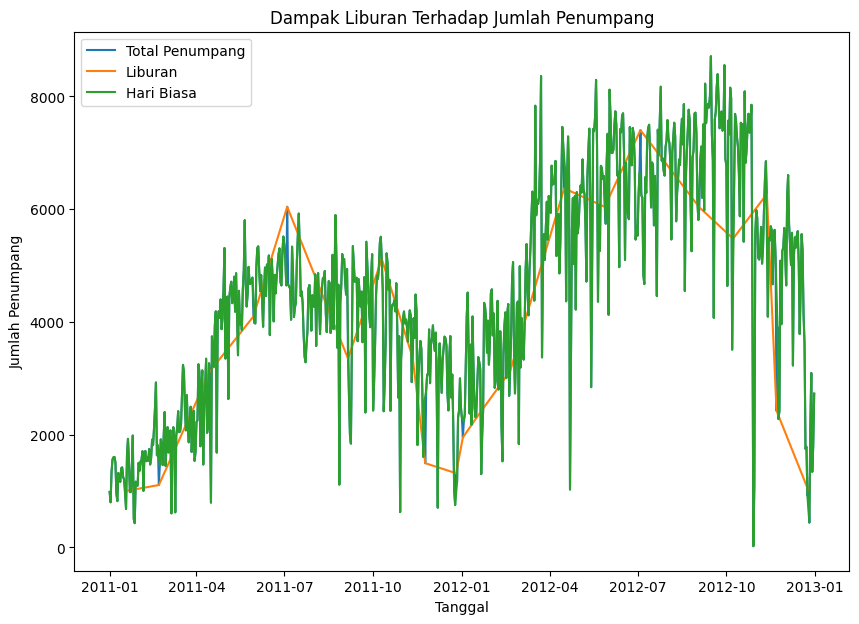

In [ ]:
plt.figure(figsize=(10, 7))
sns.lineplot(data=daily_passengers, label='Total Penumpang')
sns.lineplot(data=holiday_passengers, label='Liburan')
sns.lineplot(data=non_holiday_passengers, label='Hari Biasa')
plt.title('Dampak Liburan Terhadap Jumlah Penumpang')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penumpang')
plt.legend()
plt.show()

### Pertanyaan 2:

Berdasar total jumlah penumpang per jam dapat dilakukan 2 visualisasi, yang pertama adalah Visualisasi pola penggunaan sepeda sepanjang hari

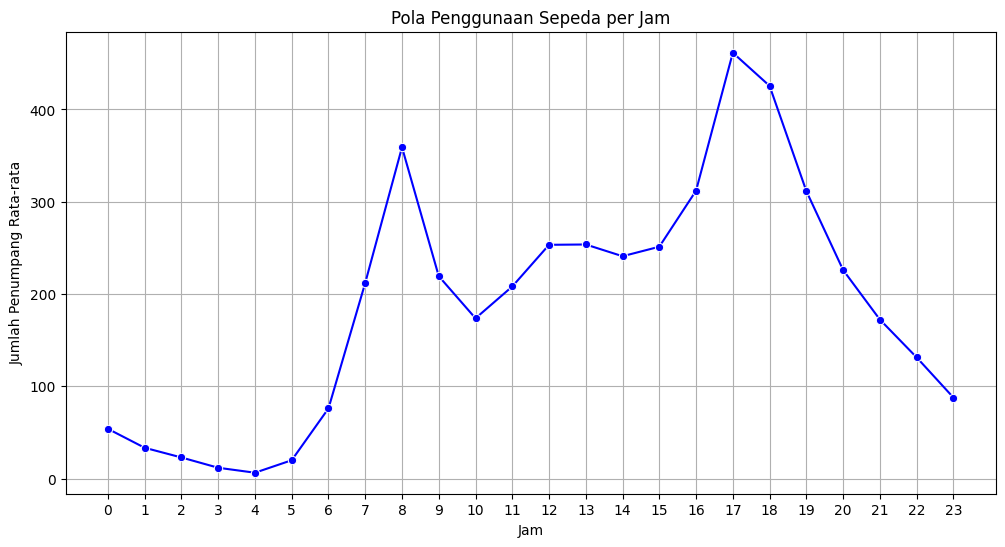

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_passengers, marker='o', color='b')
plt.title('Pola Penggunaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penumpang Rata-rata')
plt.xticks(range(24))
plt.grid(True)
plt.show()

Kemudian yang kedua adalah visualisasi Dampak pola penggunaan sepeda terhadap jumlah penumpang

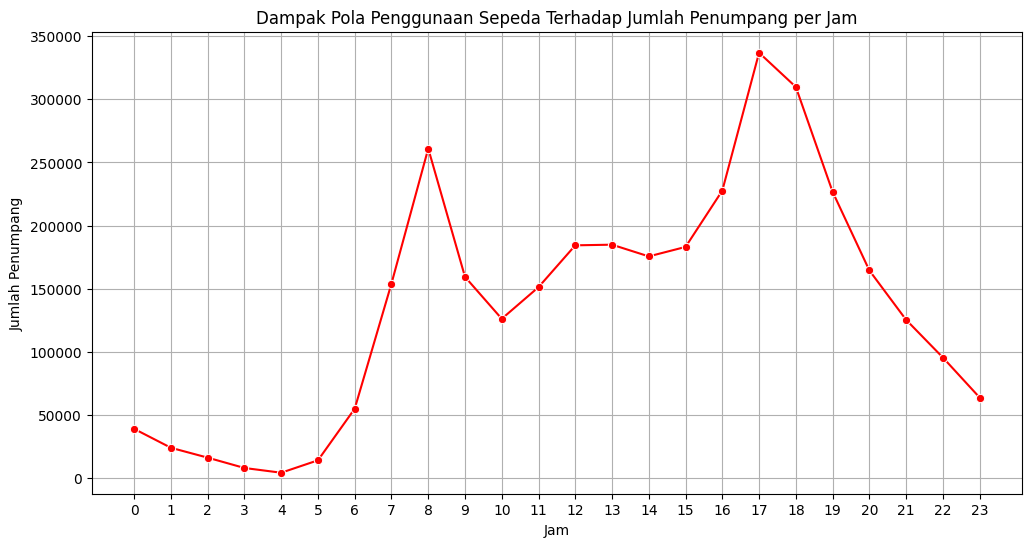

In [ ]:
hourly_counts = hour_data.groupby('hr')['count'].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_counts, marker='o', color='r')
plt.title('Dampak Pola Penggunaan Sepeda Terhadap Jumlah Penumpang per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penumpang')
plt.xticks(range(24))
plt.grid(True)
plt.show()

## Conclusion

- **Conclution pertanyaan 1**
Berdasarkan grafik "Dampak Liburan Terhadap Jumlah Penumpang", terlihat adanya peningkatan signifikan jumlah penumpang selama periode liburan, tercermin dari lonjakan tajam pada garis oranye. Meskipun fluktuasi harian tetap ada, total penumpang selama liburan menunjukkan tren peningkatan yang konsisten, menandakan dampak positif liburan dan acara khusus terhadap penggunaan layanan sepeda. Ini mengindikasikan bahwa lebih banyak orang cenderung menggunakan sepeda selama periode ini, mungkin disebabkan oleh potensi aktivitas luar ruangan yang menarik

- **Conclution pertanyaan 2**
Berdasarkan grafik yang diberikan, pola penggunaan sepeda sepanjang hari dan dampaknya terhadap jumlah penumpang dapat diamati dengan jelas. Pada jam-jam awal (0-5), penggunaan sepeda relatif rendah, mungkin karena sebagian besar orang belum aktif pada pagi hari. Namun, terjadi lonjakan tajam pada jam 6 hingga 8, kemungkinan karena banyak orang menggunakan sepeda untuk berangkat bekerja atau sekolah. Setelah itu, penggunaan sepeda menurun dan stabil hingga jam 14. Peningkatan kembali terjadi pada sore hari (15-18), mungkin karena pulang kerja atau sekolah, sebelum jumlah penumpang menurun drastis setelah pukul 18. Pola penggunaan sepeda ini berdampak langsung pada jumlah penumpang, dengan peningkatan jumlah penumpang terlihat saat penggunaan sepeda tinggi, dan sebaliknya. Hal ini menunjukkan bahwa pola penggunaan sepeda secara signifikan memengaruhi jumlah penumpang